In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [6]:
! git clone https://github.com/ryuntp/floodDetection.git

Cloning into 'floodDetection'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 149 (delta 1), reused 149 (delta 1), pack-reused 0
Receiving objects: 100% (149/149), 38.83 MiB | 38.56 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [0]:
path = Path('floodDetection')

In [0]:
path_labels = path/"labels"
path_images = path/'images'

In [9]:
filenames = get_image_files(path_images)
filenames[:10]

[PosixPath('floodDetection/images/Label_3.png'),
 PosixPath('floodDetection/images/Label_32.png'),
 PosixPath('floodDetection/images/Label_9.png'),
 PosixPath('floodDetection/images/Label_44.png'),
 PosixPath('floodDetection/images/Label_53.png'),
 PosixPath('floodDetection/images/Label_23.png'),
 PosixPath('floodDetection/images/Label_59.png'),
 PosixPath('floodDetection/images/Label_63.png'),
 PosixPath('floodDetection/images/Label_50.png'),
 PosixPath('floodDetection/images/Label_24.png')]

In [10]:
label_names = get_image_files(path_labels)
label_names[:10]

[PosixPath('floodDetection/labels/Label_5_P.png'),
 PosixPath('floodDetection/labels/Label_14_P.png'),
 PosixPath('floodDetection/labels/Label_39_P.png'),
 PosixPath('floodDetection/labels/Label_57_P.png'),
 PosixPath('floodDetection/labels/Label_33_P.png'),
 PosixPath('floodDetection/labels/Label_65_P.png'),
 PosixPath('floodDetection/labels/Label_61_P.png'),
 PosixPath('floodDetection/labels/Label_38_P.png'),
 PosixPath('floodDetection/labels/Label_29_P.png'),
 PosixPath('floodDetection/labels/Label_22_P.png')]

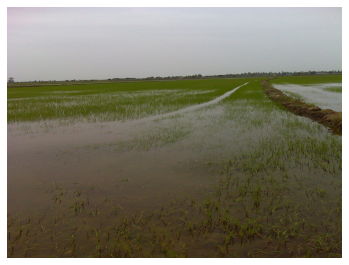

In [11]:
image_file = filenames[21]
image = open_image(image_file)
image.show(figsize=(6,6))

In [0]:
get_y_fn = lambda x: str(path_labels)+"/"+ f'{x.stem}_P{x.suffix}'

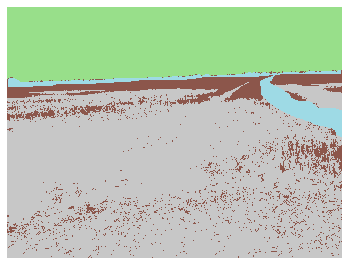

In [13]:
mask = open_mask(get_y_fn(image_file))
mask.show(figsize=(6,6), alpha=1)

In [14]:
source_size = np.array(mask.shape[1:])
source_size, mask.data

(array([720, 960]), tensor([[[1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          ...,
          [3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 2]]]))

In [15]:
codes = np.loadtxt(path/'code.txt', dtype=str)
len(codes), codes

(4, array(['sky', 'rice', 'water', 'backg'], dtype='<U5'))

In [16]:
size = source_size//2
bs = 0

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 16000: bs=16    
elif free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 0MB of GPU RAM free


In [0]:
segmentitemlist = (SegmentationItemList.from_folder(path_images)
              .split_by_rand_pct(valid_pct=0.2)
              .label_from_func(get_y_fn, classes=codes))
# print(segmentitemlist)

In [0]:
databunch = (segmentitemlist.transform(get_transforms(), 
                                  size=size, tfm_y=True)
             .databunch(bs=bs)
             .normalize(imagenet_stats))

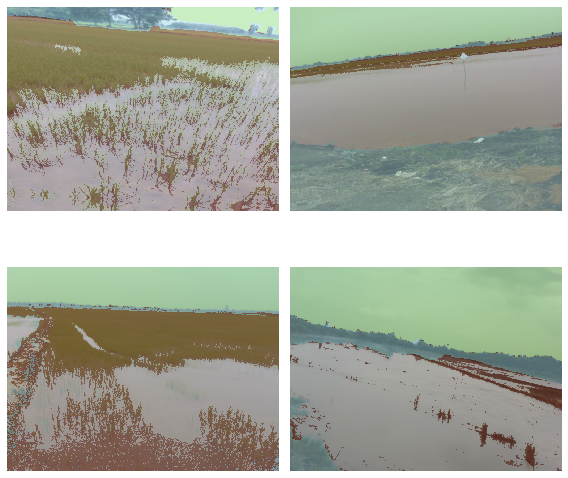

In [19]:
databunch.show_batch()